# **CASE STUDY ON RED WINE QUALITY DATA**


In [ ]:
#nessesory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import scipy.stats as st

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


CASE STUDY QUESTION: **Predicting Wine Quality**

**SUB QUESTION:** Which is the variable which is more affecting the quality of alcohol.

**About the dataset:**

*This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Here we have different variables which may effect the quality of the wine . In this data set there are 12 columns and 1599 rows , amoung 12 columns quality column is taken into consideration.*

**Attribute Information:**

*Input variables:*

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [ ]:
#loding the dataset .
df=pd.read_csv("/content/drive/MyDrive/Red wine quality.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
print("Totally there are {} null values in the dataset".format(df.isnull().sum().sum()))

Totally there are 0 null values in the dataset


*As we can see there are no null values let us proceed with our furthur analysis by looking how the variables are variaing with each other so lets get into visualization.*

**VISUALIZATION**

In [ ]:
#libraries for the visualization
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px

*HISTOGRAM*

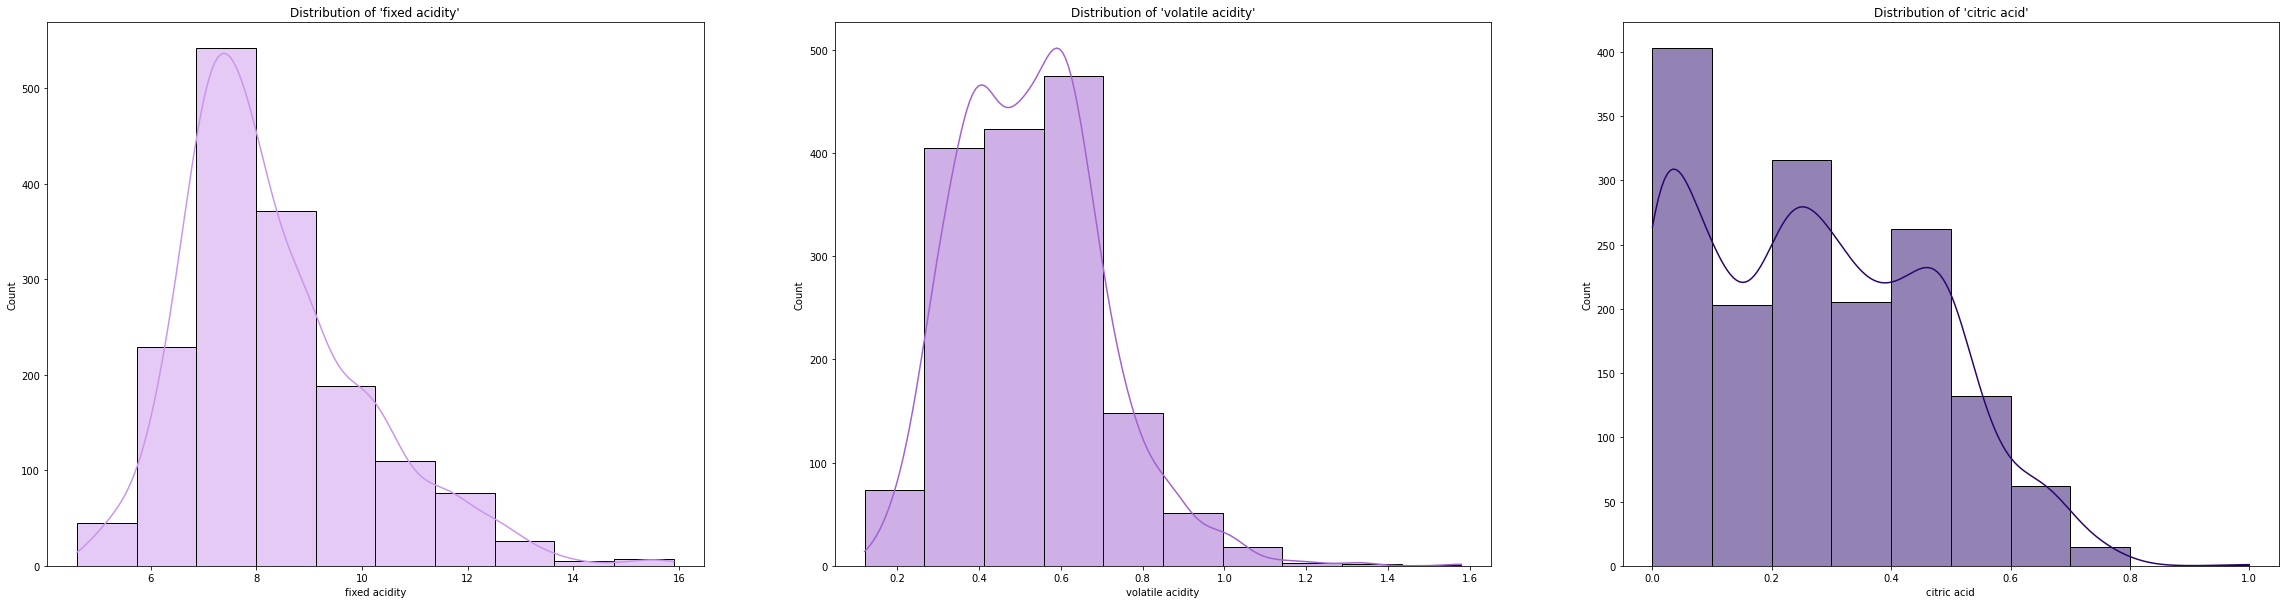

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))

sns.histplot(ax = axes[0], x = df["fixed acidity"],bins = 10,kde = True,
             cbar = True, color = "#CA96EC").set(title = "Distribution of 'fixed acidity'");

sns.histplot(ax = axes[1], x = df["volatile acidity"], bins = 10,cbar = True,
            kde = True,color = "#A163CF").set(title = "Distribution of 'volatile acidity'");

sns.histplot(ax = axes[2], x = df["citric acid"],bins = 10,kde = True,cbar = True,
             color = "#29066B").set(title = "Distribution of 'citric acid'");


*Analyzing the graphs here, it turns out that the values of the variable 'fixed_acidity' are relatively normally distributed (but a bit left skewed). But there are two peaks in the distributions of other 'volatile_acidity' and 'citric_acid' variables.*

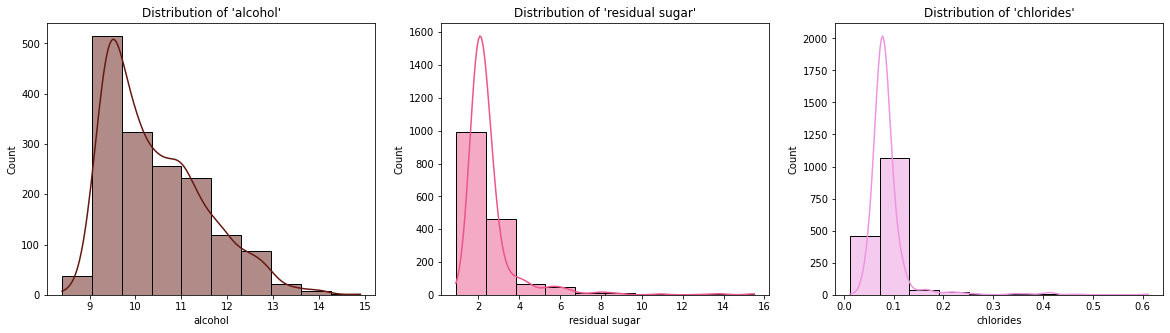

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(ax = axes[0], x = df["alcohol"],bins = 10,kde = True,cbar = True,
             color = "#641811").set(title = "Distribution of 'alcohol'");

sns.histplot(ax = axes[1], x = df["residual sugar"],bins = 10,kde = True,
cbar = True,color = "#EB548C").set(title = "Distribution of 'residual sugar'");

sns.histplot(ax = axes[2], x = df["chlorides"],bins = 10,kde = True,cbar = True,
             color = "#EC96E0").set(title = "Distribution of 'chlorides'");

*Turns out that the distributions of these variables are not normal.*

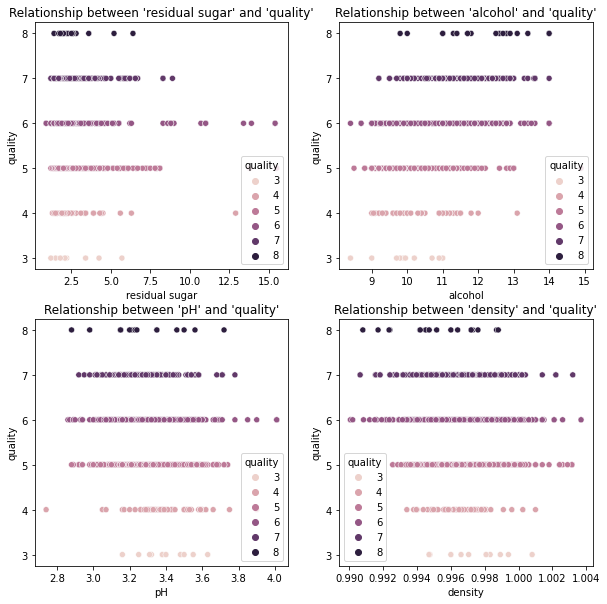

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "residual sugar", y = "quality",
                hue = "quality", data = df).set(title =
                        "Relationship between 'residual sugar' and 'quality'");

sns.scatterplot(ax = axes[1],x = "alcohol",y = "quality", hue = "quality",
        data = df).set(title = "Relationship between 'alcohol' and 'quality'");

sns.scatterplot(ax = axes[2], x = "pH",y = "quality", hue = "quality",
            data = df).set(title = "Relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[3],x = "density",y = "quality", hue = "quality",
        data = df).set(title = "Relationship between 'density' and 'quality'");

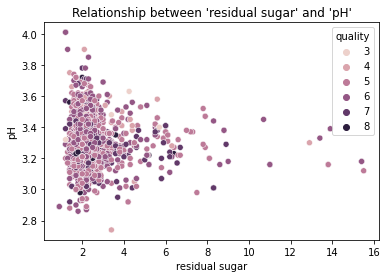

In [ ]:
sns.scatterplot(x = "residual sugar",y = "pH",hue = "quality",
      data = df).set(title = "Relationship between 'residual sugar' and 'pH'");

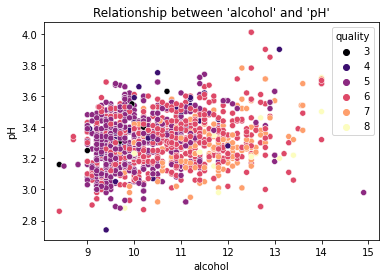

In [ ]:
sns.scatterplot(x = "alcohol",y = "pH",hue = "quality",palette = "magma",
              data = df).set(title = "Relationship between 'alcohol' and 'pH'");

*Both the above 2 scatter plot doesnot have correlation between each other.
that is there is not correlation between 'alcohol' and 'pH' variables and there is not correlation between 'residual sugar' and 'pH' variables.*

**CORRELATION**

Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. A correlation between variables, however, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable.

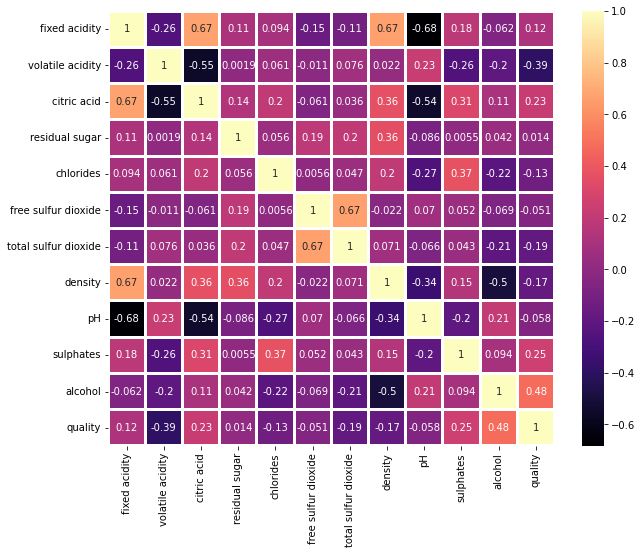

In [ ]:
plt.figure(figsize = [10, 8], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");

According to heatmap, We can observe that, the 'alcohol, sulphates, citric_acid & fixed_acidity' have maximum corelation with response variable 'quality'. This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, we will use only these 4 variables in our future analysis.

**So we can focus on alcohol-quality and density-alcohol relations to get meaningful exploration**

**Pearson correlation coefficient**

In [ ]:
print("Pearson correlation coefficient:",st.pearsonr(df["alcohol"],df["density"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["citric acid"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"], df["density"]))

Pearson correlation coefficient: (-0.49617977024448817, 3.9388353284322485e-100)
Pearson correlation coefficient: (-0.6829781945685314, 4.063034039847446e-220)
Pearson correlation coefficient: (-0.5419041447395097, 1.0072013259121818e-122)
Pearson correlation coefficient: (0.6680472921189734, 3.0747470608642413e-207)


*There is coliniaruty between varibales but there are multicoliniarity problem also.To over come this problem lets preprocess the data and classfify them.*

**DATA PREPROCESSING**

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
quality = df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

In [ ]:
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([df,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)

In [ ]:
data.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Mid
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Mid
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Mid
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Mid


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Mid     1319
Good     217
Bad       63
Name: category, dtype: int64

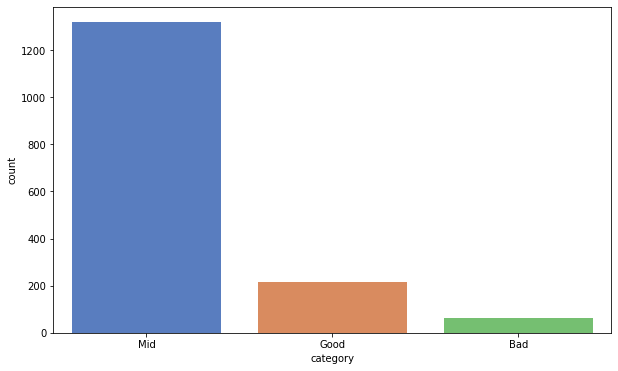

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"],palette="muted")
data["category"].value_counts()

Setting features, labels and Encoding the categorical data for the prediction.

(good=1, med=2, bad=3)

In [ ]:
X= data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
def removing_outliers (data):
    data = data[np.abs(data.quality - data.quality.mean()) < (data.quality.std() * 2)]
    return data

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Mid
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Mid
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Mid
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid


Training the Model and Predicting the Test Data

**LOGISTIC REGRESSION**

Based on a given dataset of independent variables, logistic regression calculates the likelihood that an event will occur, such as voting or not voting. Given that the result is a probability, the dependent variable's range is 0 to 1.

In [ ]:
import warnings
warnings.filterwarnings('always')  #for some classifier error in the output

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(multi_class= 'ovr', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
print(metrics.confusion_matrix(y_test, y_pred))

accuracy= metrics.accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0      1.000     0.000     0.000        13
           1      0.455     0.333     0.385        30
           2      0.889     0.957     0.922       277

    accuracy                          0.859       320
   macro avg      0.781     0.430     0.435       320
weighted avg      0.853     0.859     0.834       320

[[  0   0  13]
 [  0  10  20]
 [  0  12 265]]
0.859375


**Support Vector Machine**

One of the most well-liked supervised learning algorithms, Support Vector Machine, or SVM, is used to solve Classification and Regression problems. However, it is primarily employed in Machine Learning Classification issues.

The SVM algorithm's objective is to establish the best line or decision boundary that can divide n-dimensional space into classes, allowing us to quickly classify new data points in the future. A hyperplane is the name given to this optimal decision boundary.

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.64      0.30      0.41        30
           2       0.89      0.98      0.93       277

    accuracy                           0.88       320
   macro avg       0.51      0.43      0.45       320
weighted avg       0.83      0.88      0.85       320



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**RANDOM FOREST CLASSIFIER**

Regression or classification issues can be resolved using the random forest classifier. Each decision tree in the ensemble that makes up the random forest algorithm is made of a data sample taken from a training set with replacement known as the bootstrap sample.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.62      0.60      0.61        30
           2       0.91      0.96      0.94       277

    accuracy                           0.89       320
   macro avg       0.51      0.52      0.52       320
weighted avg       0.85      0.89      0.87       320



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**K-NEAREST NEIGBHOUR**

The k-nearest neighbours algorithm, also referred to as KNN or k-NN, is a supervised learning classifier that uses proximity to make classifications or predictions about the grouping of a single data point.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.55      0.57      0.56        30
           2       0.91      0.95      0.93       277

    accuracy                           0.88       320
   macro avg       0.49      0.51      0.50       320
weighted avg       0.84      0.88      0.86       320



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CONCLUSION ON TRAINING AND PREDICTION OF DATA:

In [ ]:
conclusion = pd.DataFrame(
    {'models': ["SVC","Random Forest","KNN","LogisticRegression"],
     'accuracies': [accuracy_score(y_test,pred_svc),
                    accuracy_score(y_test,pred_rfc),
                    accuracy_score(y_test,pred_knn),accuracy]})
conclusion

,models,accuracies
0,SVC,0.878125
1,Random Forest,0.890625
2,KNN,0.875000
3,LogisticRegression,0.859375


**As a result, we can see Random Forest model has the best accurary ratio for predicting our wine quality!**



**INTERPRETATION**

*So as we can see form the above classification analysis we can see that the quality of the red wine depends on each of the contents in it. We've summarized our results in a table, and it is clear that all of our trained classifier models perform relatively well on our test data. The clear winner however is our hyperparameter-tuned Random Forest Classifier model, with a randome forst accuracy score of 0.890625.*

**CONCLUSION** (REPORT)

Results of preliminary analysis
* Alcohol, sulphates, citric acid, volatile acid (difference acrossqualities)
* pH, density, total sulfur dioxide, free sulfur dioxide, chlorides, residual sugar, fixed acidity (no differences).
* Majority of observations between 5-6 so identification of low and high quality is not as clear.
* Relationship between variables provides some linear relationship, but quality is not clear.

This has focused on predicting quality wine based on biophysical characteristics and then pricing them in the market. We are only getting around 80%-90% accuracy.

So as we can say that as the alcohol and the cholrides content is more in the wine the quality ranges from 5-8 which is the good quality .By the visulaization we saw there was lot of multicoliniarity between the variable so by using random forest for the classification we overcome this multicoliniarity problem and can got accuracy of 89%.


So we can conclude from the analysis that the wine quality totally depends on the alcohol, cholrides and sulphides in them.




**THANK YOU**